In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime as dt
import dateutil
from sklearn import preprocessing

In [ ]:
tomato_data = pd.read_csv("../data/Price of Tomato Karnataka(2016-2018).csv",
                          names= ["Market Area",'Date',"Tonnes","Variety","Minimum Price(Rs./Quintal)",
                                  "Maximum Price(Rs./Quintal)","Modal Price(Rs./Quintal)"], 
                          skiprows = 1,
                          sep = ',', engine = 'python'
                       )

In [4]:
tomato_data.head()

,Market Area,Date,Tonnes,Variety,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal)
0,Bagepalli,2/1/2016,6.0,Tomato,1000,1800,1550
1,Bagepalli,4/1/2016,6.0,Tomato,900,1800,1550
2,Bagepalli,5/1/2016,6.0,Tomato,1400,2500,2200
3,Bagepalli,6/1/2016,4.0,Tomato,1400,3000,2400
4,Bagepalli,7/1/2016,5.0,Tomato,1400,2600,2200


In [5]:
tomato_data['Date'].describe()

count          11321
unique           844
top       16/08/2016
freq              24
Name: Date, dtype: object

In [6]:
Arrival_date =pd.to_datetime(tomato_data['Date'], format='%d/%m/%Y')
Arrival_date.head()

0   2016-01-02
1   2016-01-04
2   2016-01-05
3   2016-01-06
4   2016-01-07
Name: Date, dtype: datetime64[ns]

In [7]:
tomato_data['Tonnes'].describe()

count    11321.000000
mean        80.269146
std        154.967086
min          1.000000
25%          4.000000
50%         19.000000
75%         70.000000
max       1931.000000
Name: Tonnes, dtype: float64

In [8]:
df1 = pd.DataFrame()


df1['quantity'] = tomato_data["Tonnes"]
# Create a column from the datetime variable
df1['datetime'] =Arrival_date
# Convert that column into a datetime datatype
df1['datetime'] = pd.to_datetime(df1['datetime'])
# Set the datetime column as the index
df1.index = df1['datetime'] 
df1.head()

,quantity,datetime
datetime,,
2016-01-02,6.0,2016-01-02
2016-01-04,6.0,2016-01-04
2016-01-05,6.0,2016-01-05
2016-01-06,4.0,2016-01-06
2016-01-07,5.0,2016-01-07


In [9]:
quantity_dates = df1.resample('M').mean()
quantity_dates['quantity']#.describe()

datetime
2016-01-31     43.821875
2016-02-29     59.581081
2016-03-31     51.060976
2016-04-30     56.717808
2016-05-31     42.181081
2016-06-30     52.720000
2016-07-31    129.730193
2016-08-31    192.055249
2016-09-30    113.322368
2016-10-31     90.642674
2016-11-30    102.309469
2016-12-31     68.948357
2017-01-31     46.817175
2017-02-28     43.940054
2017-03-31     47.575000
2017-04-30     77.454094
2017-05-31     73.133188
2017-06-30     91.918367
2017-07-31    101.143541
2017-08-31     83.368778
2017-09-30     70.103774
2017-10-31     59.867168
2017-11-30     59.372449
2017-12-31     93.352357
2018-01-31    103.591981
2018-02-28     83.503916
2018-03-31     67.445255
2018-04-30     59.985714
Name: quantity, dtype: float64

In [ ]:
sns.histplot(quantity_dates, bins=7, kde=True, label="Tonnes")

From this we can see that mostly the tomato produce is 40 - 60 tonnes a month, with occasionally touching 200 tonnes (as on 2016-08-31)

In [11]:
#auto_data['price'] = pd.to_numeric(auto_data['price'], errors='coerce')
tomato_data['Minimum Price(Rs./Quintal)'].describe()

count     11456
unique      679
top         300
freq       1179
Name: Minimum Price(Rs./Quintal), dtype: object

In [12]:
tomato_data['Minimum Price(Rs./Quintal)'] = pd.to_numeric(tomato_data['Minimum Price(Rs./Quintal)'], errors='coerce')
tomato_data['Minimum Price(Rs./Quintal)'].describe()

count    11421.000000
mean       859.348131
std        922.099169
min         22.000000
25%        300.000000
50%        500.000000
75%       1000.000000
max       9000.000000
Name: Minimum Price(Rs./Quintal), dtype: float64

In [13]:
tomato_data['Maximum Price(Rs./Quintal)'] = pd.to_numeric(tomato_data['Maximum Price(Rs./Quintal)'], errors='coerce')
tomato_data['Maximum Price(Rs./Quintal)'].describe()

count    11421.000000
mean      1603.457228
std       1381.576640
min        100.000000
25%        600.000000
50%       1000.000000
75%       2100.000000
max      10000.000000
Name: Maximum Price(Rs./Quintal), dtype: float64

In [14]:
tomato_data['Modal Price(Rs./Quintal)'] = pd.to_numeric(tomato_data['Modal Price(Rs./Quintal)'], errors='coerce')
tomato_data['Modal Price(Rs./Quintal)'].describe()

count    11421.000000
mean      1268.266001
std       1122.133297
min         70.000000
25%        500.000000
50%        867.000000
75%       1700.000000
max       9000.000000
Name: Modal Price(Rs./Quintal), dtype: float64

In [15]:
df2 = pd.DataFrame()
df2['modal_price'] = tomato_data["Modal Price(Rs./Quintal)"]
df2['datetime'] =Arrival_date
df2['datetime'] = pd.to_datetime(df2['datetime'])
# Set the datetime column as the index
df2.index = df2['datetime'] 
df2.head()


,modal_price,datetime
datetime,,
2016-01-02,1550.0,2016-01-02
2016-01-04,1550.0,2016-01-04
2016-01-05,2200.0,2016-01-05
2016-01-06,2400.0,2016-01-06
2016-01-07,2200.0,2016-01-07


In [16]:
price_dates = df2.resample('M').mean()
price_dates.describe()

,modal_price
count,28.000000
mean,1280.881167
std,928.443600
min,390.492958
25%,571.639792
50%,904.672828
75%,1667.135607
max,3719.181818


In [ ]:
sns.histplot(price_dates, bins=7, kde=True)

From this we find most of the prices between 300 - 700 average Rs 500 per quintall <br>
that means for average 50 tonnes per month market value is approximately (500x50x10 = 250000) -> Rs 2,50,000

Populating the interactive namespace from numpy and matplotlib


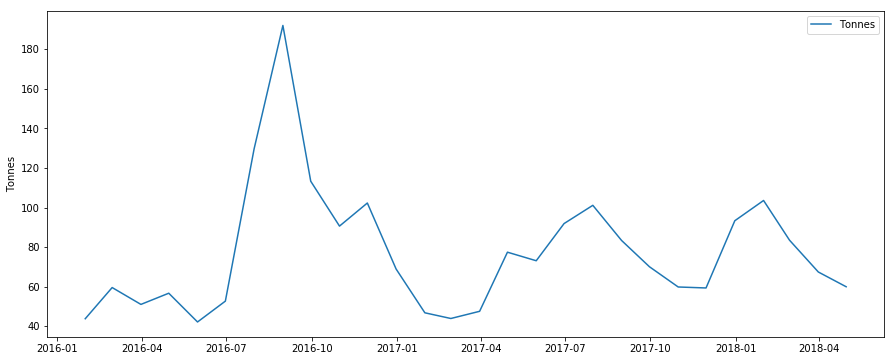

In [18]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15,6)
plt.plot(quantity_dates, label='Tonnes')
plt.ylabel('Tonnes')

plt.legend()
plt.show()

Populating the interactive namespace from numpy and matplotlib


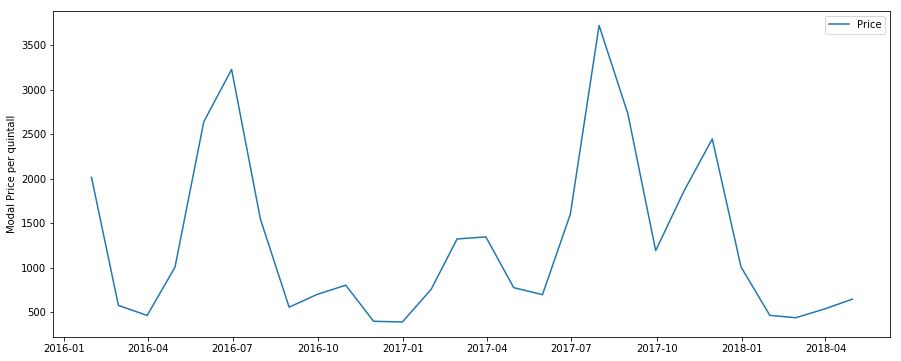

In [19]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15,6)
plt.plot(price_dates, label='Price')
plt.ylabel('Modal Price per quintall')

plt.legend()
plt.show()

Populating the interactive namespace from numpy and matplotlib


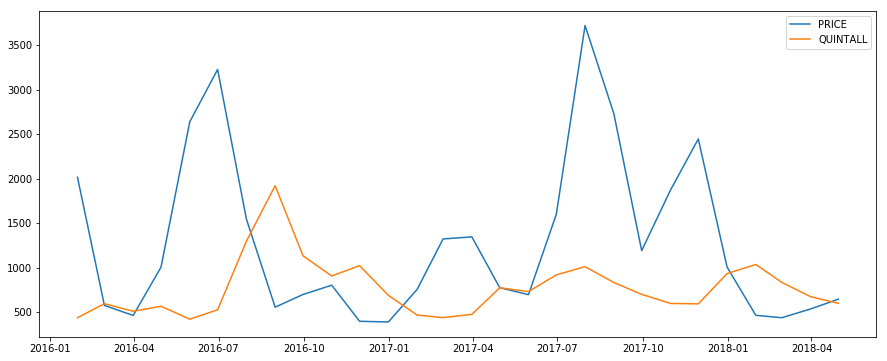

In [20]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15,6)
plt.plot(price_dates, label='PRICE')
plt.plot(quantity_dates*10, label='QUINTALL')
#plt.ylabel('numbers')

plt.legend()
plt.show()

From this we can clearly see the rise in prices with fall in supply and vice versa <br>
An intresting thing to note is that in July 2016 there is  sharp rise in prices , and a similar peak is observed in August 2017.<br>
The rise in supply in september is matched with a steep fall in prices.<br>
While in 2017, the supply was maintained below 100 tonnes which has led the prices to be higher than 2016. <br>
Surprisingly, in 2016, the beginnig of the year had high prices, which steadly came down until April. <br>
In 2017 the prices steadly increased from January, until April. <br>
And again in 2018, the prices slowely rise from January to April.<br>

In [21]:
tomato_data[tomato_data.isnull().any(axis=1)].head()

,Market Area,Date,Tonnes,Variety,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal)
166,Hoskote,NaN,NaN,Tomato,2000.0,2400.0,2300.0
9037,Bagepalli,21/11/2017,13.0,NaN,NaN,NaN,NaN
9038,Bagepalli,22/11/2017,13.0,NaN,NaN,NaN,NaN
9039,Bagepalli,23/11/2017,14.0,NaN,NaN,NaN,NaN
9040,Bagepalli,25/11/2017,16.0,NaN,NaN,NaN,NaN


In [22]:
#tomato_data[tomato_data.isnull().any(axis=1)].head()
tomato_data = tomato_data.dropna()
tomato_data[tomato_data.isnull().any(axis=1)]

,Market Area,Date,Tonnes,Variety,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal)


In [23]:
tomato_data.describe()

,Tonnes,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal)
count,11286.000000,11286.000000,11286.000000,11286.000000
mean,80.351763,865.686691,1614.727096,1277.500177
std,155.098364,925.624774,1385.597676,1125.409306
min,1.000000,22.000000,100.000000,70.000000
25%,4.000000,300.000000,600.000000,500.000000
50%,19.000000,500.000000,1000.000000,900.000000
75%,70.000000,1000.000000,2135.000000,1748.500000
max,1931.000000,9000.000000,10000.000000,9000.000000


Kannakapura / Kolar has higher max price <br>
Somvarpet has higher min price<br>
Similar modal prices

In [24]:
le = preprocessing.LabelEncoder()

In [25]:
variety_tomato_data = tomato_data
variety_tomato_data['Market Area'] = le.fit_transform(tomato_data['Market Area'].astype(str))
variety_tomato_data['Variety'] = le.fit_transform(tomato_data['Variety'].astype(str))
#sns.distplot(variety_tomato_data["Variety"],bins=2,  kde=True, rug=True)

In [ ]:
sns.histplot(variety_tomato_data["Variety"], kde=True)

In [ ]:
sns.histplot(variety_tomato_data["Market Area"], kde=True)

In [ ]:
sns.pairplot(tomato_data, height=5, aspect=0.9,
            x_vars = ["Market Area", "Tonnes", "Variety"],
            y_vars = ["Minimum Price(Rs./Quintal)", "Maximum Price(Rs./Quintal)", "Modal Price(Rs./Quintal)"],
            hue = "Variety")

It is clear that prices of hybdrid is lower that the normal variety

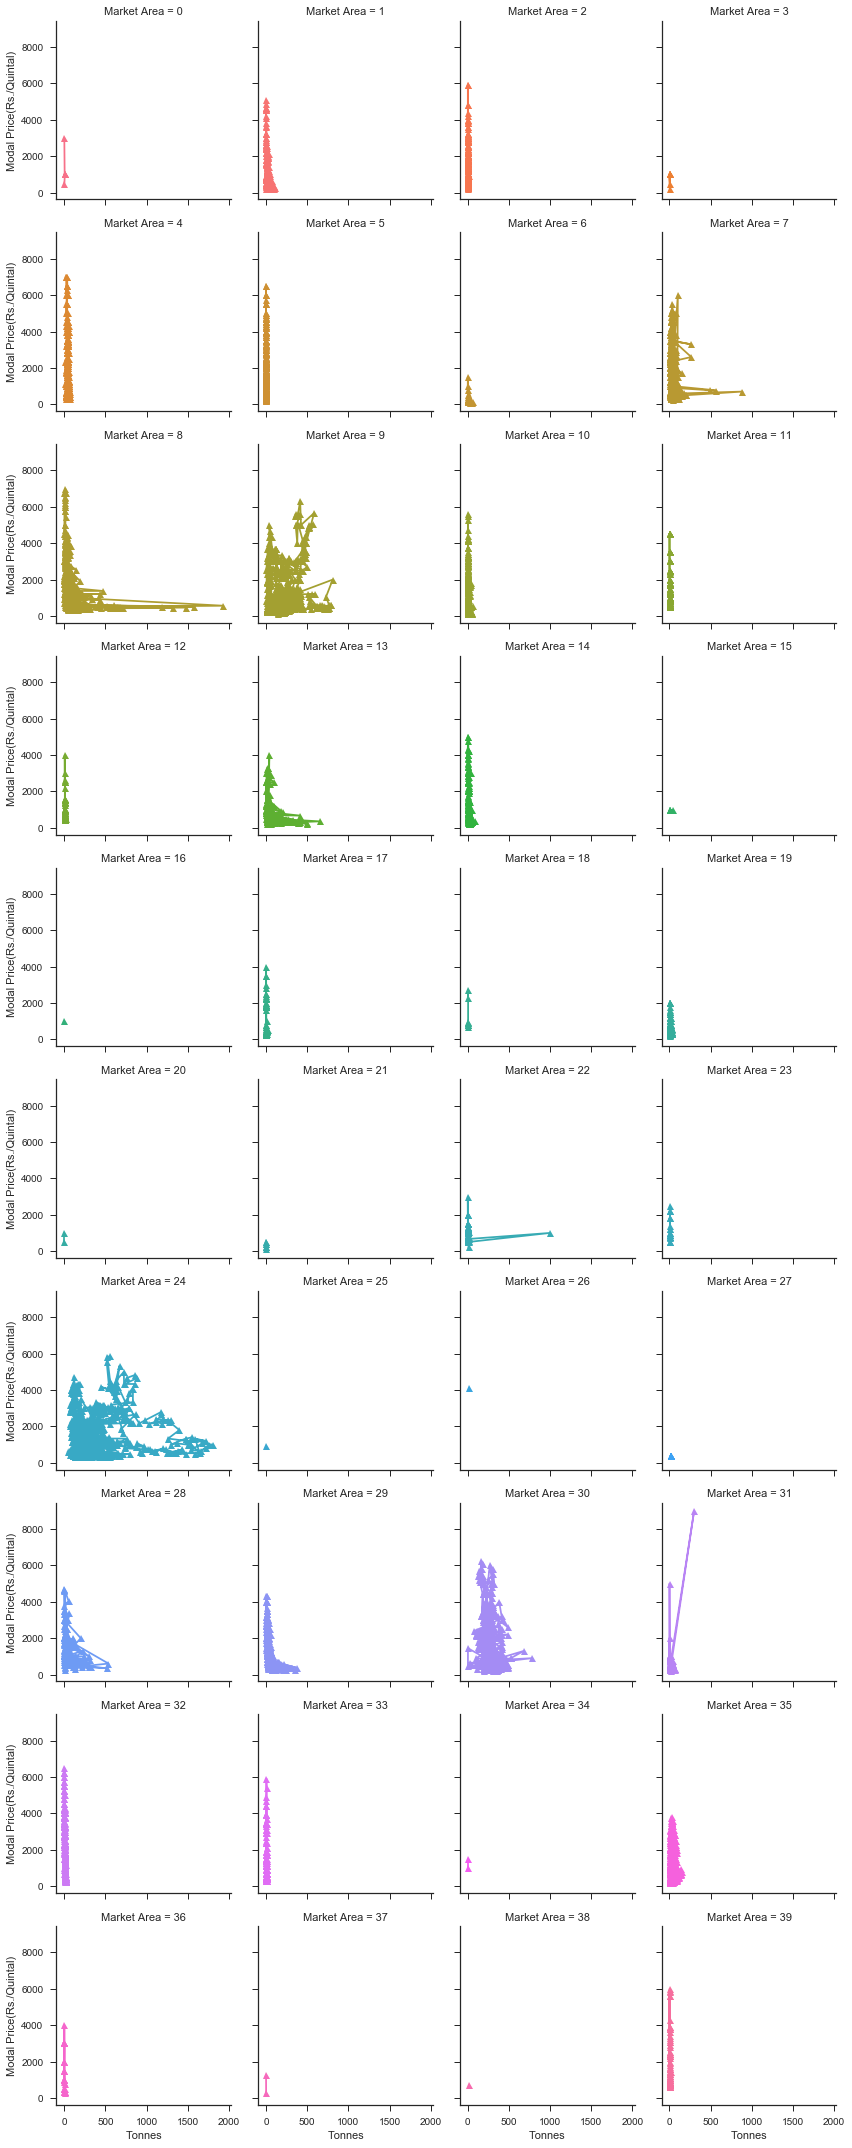

In [29]:
sns.set(style="ticks")



# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(tomato_data, col="Market Area", hue="Market Area",col_wrap=4)

# Draw a horizontal line to show the starting point
#grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "Tonnes","Modal Price(Rs./Quintal)", marker="^")

# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

We find very less or no data for markets: Kollegal(1), Kudchi(1), Arasikere(3), Holalkere(2), Belur(3), Somvarpet(1), Tumkur(3), T.Narasipura(3), Maddur(3), Tarikere(2), Holenarsipura(1), Hunsur(2)
So  we neglect them and modify data

In [ ]:
data = pd.read_csv("../data/Price of Tomato Karnataka(2016-2018).csv",names= ["Market Area",'Date',"Tonnes","Variety","Minimum Price(Rs./Quintal)",
                                  "Maximum Price(Rs./Quintal)","Modal Price(Rs./Quintal)"], skiprows = 1)
data.head()

In [31]:
data = data.dropna()
data[data.isnull().any(axis=1)]

,Market Area,Date,Tonnes,Variety,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal)


In [32]:
data.head()

,Market Area,Date,Tonnes,Variety,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal)
0,Bagepalli,02-01-2016,6.0,Tomato,1000,1800,1550
1,Bagepalli,04-01-2016,6.0,Tomato,900,1800,1550
2,Bagepalli,05-01-2016,6.0,Tomato,1400,2500,2200
3,Bagepalli,06-01-2016,4.0,Tomato,1400,3000,2400
4,Bagepalli,07-01-2016,5.0,Tomato,1400,2600,2200


In [33]:
data['Modal Price(Rs./Quintal)'] = pd.to_numeric(data['Modal Price(Rs./Quintal)'], errors='coerce')
data['Maximum Price(Rs./Quintal)'] = pd.to_numeric(data['Maximum Price(Rs./Quintal)'], errors='coerce')
data['Minimum Price(Rs./Quintal)'] = pd.to_numeric(data['Minimum Price(Rs./Quintal)'], errors='coerce')

In [34]:
data.describe()

,Tonnes,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal)
count,11095.000000,11095.000000,11095.000000,11095.000000
mean,81.645246,866.312483,1626.747183,1284.428571
std,156.147368,927.089575,1389.437872,1128.143463
min,1.000000,22.000000,110.000000,90.000000
25%,4.000000,300.000000,600.000000,500.000000
50%,20.000000,500.000000,1030.000000,900.000000
75%,73.000000,1000.000000,2200.000000,1750.000000
max,1931.000000,9000.000000,10000.000000,9000.000000


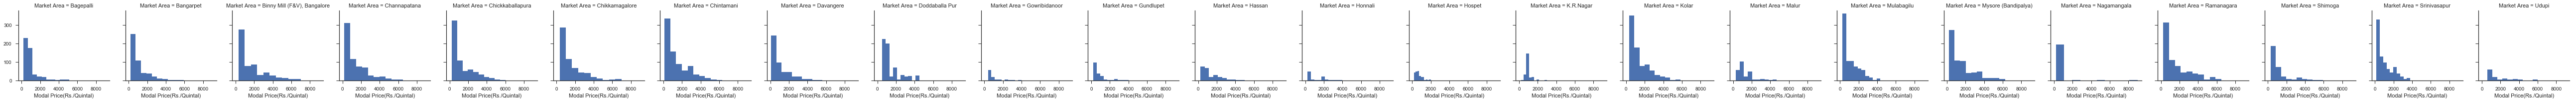

In [35]:
g = sns.FacetGrid(data, col="Market Area")
g.map(plt.hist, "Modal Price(Rs./Quintal)")

In [ ]:
new_variety_tomato_data = data
new_variety_tomato_data['Market Area'] = le.fit_transform(data['Market Area'].astype(str))
sns.histplot(new_variety_tomato_data["Market Area"], kde=True)

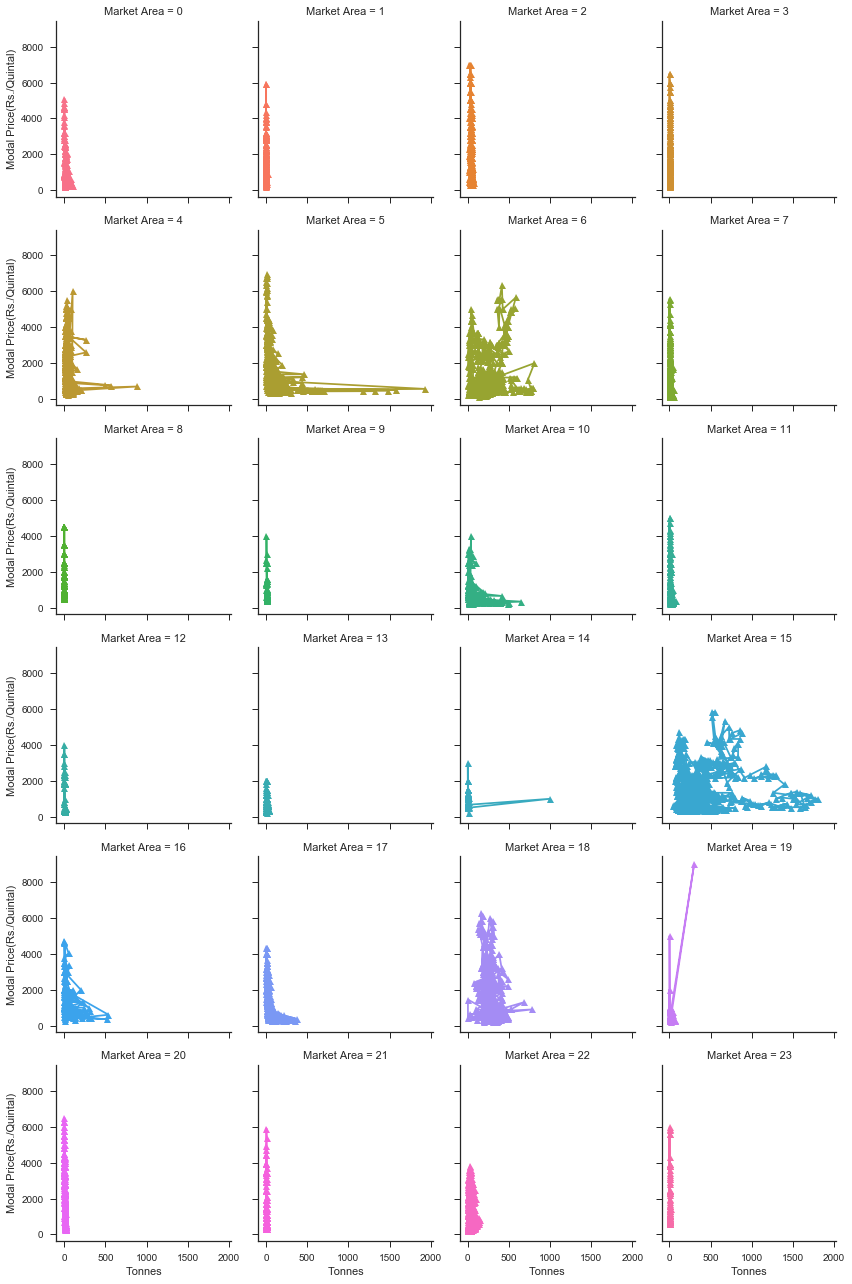

In [37]:
sns.set(style="ticks")



# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(data, col="Market Area", hue="Market Area",col_wrap=4)

# Draw a horizontal line to show the starting point
#grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "Tonnes","Modal Price(Rs./Quintal)", marker="^")

# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

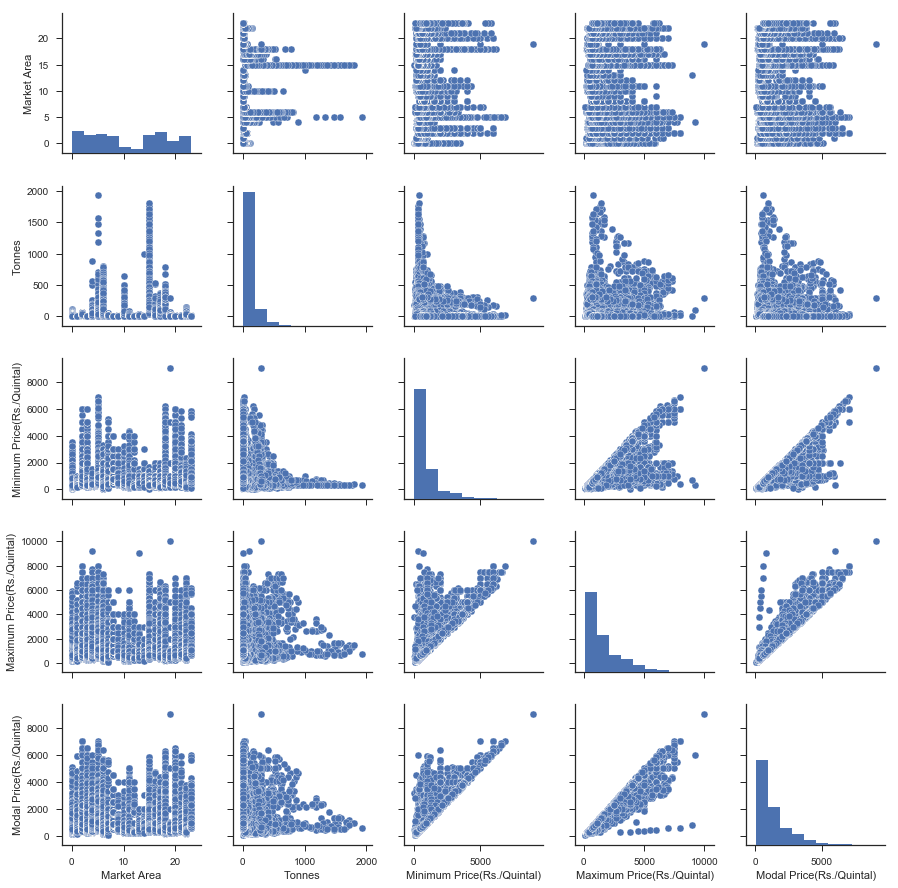

In [38]:
sns.pairplot(data)

In [ ]:
sns.pairplot(data, height=5, aspect=0.9,
            x_vars = ["Tonnes"],
             y_vars = ["Minimum Price(Rs./Quintal)","Maximum Price(Rs./Quintal)", "Modal Price(Rs./Quintal)"],
             kind = "reg",
             hue = "Market Area")

In [ ]:
sns.pairplot(data, height=5, aspect=0.9, kind = "scatter",
            x_vars = ["Tonnes"],
            y_vars = ["Minimum Price(Rs./Quintal)", "Maximum Price(Rs./Quintal)", "Modal Price(Rs./Quintal)"],
            hue = "Market Area")

In [ ]:
sns.pairplot(data, height=5, aspect=0.9,
            x_vars = ["Market Area"],
            y_vars = ["Minimum Price(Rs./Quintal)", "Maximum Price(Rs./Quintal)", "Modal Price(Rs./Quintal)", "Tonnes",],
            hue = "Market Area")

# Find what tonnes does market need

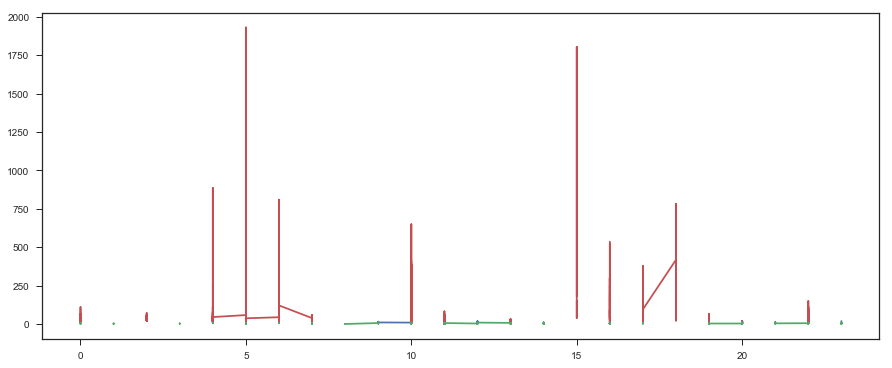

In [42]:
t = data["Market Area"]
s = data["Tonnes"]

upper = 20
lower = 10


supper = np.ma.masked_where(s < upper, s)
slower = np.ma.masked_where(s > lower, s)
smiddle = np.ma.masked_where(np.logical_or(s < lower, s > upper), s)

fig, ax = plt.subplots()
ax.plot(t, smiddle, t, slower, t, supper)
plt.show()

In [ ]:
sns.pairplot(data, height=5, aspect=0.9,
            x_vars = ["Market Area"],
            y_vars = [ "Modal Price(Rs./Quintal)"],
            hue = "Tonnes")

for same quantity different markets have diff prices 1-10 red, shade red 10-20

In [44]:
small_tomato_data = data.drop(['Minimum Price(Rs./Quintal)','Maximum Price(Rs./Quintal)', 'Variety'], axis=1)
small_tomato_data.head()

,Market Area,Date,Tonnes,Modal Price(Rs./Quintal)
0,0,02-01-2016,6.0,1550
1,0,04-01-2016,6.0,1550
2,0,05-01-2016,6.0,2200
3,0,06-01-2016,4.0,2400
4,0,07-01-2016,5.0,2200


In [45]:
df3 = pd.DataFrame()

df3['datetime'] =Arrival_date
df3['datetime'] = pd.to_datetime(df3['datetime'])
df3['modal_price'] = tomato_data["Modal Price(Rs./Quintal)"]
df3['Quantity'] = tomato_data["Tonnes"]
df3['Market'] = tomato_data["Market Area"]
# Set the datetime column as the index
df3.index = df3['datetime'] 
df3.head()

,datetime,modal_price,Quantity,Market
datetime,,,,
2016-01-02,2016-01-02,1550.0,6.0,1.0
2016-01-04,2016-01-04,1550.0,6.0,1.0
2016-01-05,2016-01-05,2200.0,6.0,1.0
2016-01-06,2016-01-06,2400.0,4.0,1.0
2016-01-07,2016-01-07,2200.0,5.0,1.0


In [ ]:
sns.pairplot(df3, height=5, aspect=0.9,
            x_vars = ["Market"],
            y_vars = [ "modal_price"],
            hue = "Quantity")

In [47]:
market_dates = df3.resample('M').sum()
market_dates

,modal_price,Quantity,Market
datetime,,,
2016-01-31,644718.0,14023.0,5882.0
2016-02-29,170682.0,17636.0,5361.0
2016-03-31,190113.0,20935.0,7546.0
2016-04-30,367197.0,20702.0,6500.0
2016-05-31,976039.0,15607.0,6865.0
2016-06-30,1290208.0,21088.0,7399.0
2016-07-31,722325.0,60584.0,8627.0
2016-08-31,302274.0,104286.0,9916.0
2016-09-30,318805.0,51675.0,8268.0


In [48]:
df4 = pd.DataFrame()

df4['datetime'] =Arrival_date
df4['datetime'] = pd.to_datetime(df4['datetime'])
df4['Market'] = tomato_data["Market Area"]
# Set the datetime column as the index
df4.index = df3['datetime'] 
df4.tail()

market_dates = df4.resample('M').count().sum()
market_dates

datetime    11321
Market      11286
dtype: int64

In [49]:
market_dates = df4.resample('M').count()
market_dates

,datetime,Market
datetime,,
2016-01-31,320,320
2016-02-29,296,296
2016-03-31,410,410
2016-04-30,365,365
2016-05-31,370,370
2016-06-30,400,400
2016-07-31,467,467
2016-08-31,543,543
2016-09-30,456,456


In [50]:
small_tomato_data['Market Area'] = le.fit_transform(small_tomato_data['Market Area'].astype(str))
small_tomato_data.tail()

,Market Area,Date,Tonnes,Modal Price(Rs./Quintal)
11258,16,14-03-2018,5.0,800
11259,16,21-03-2018,6.0,850
11260,16,28-03-2018,7.0,1000
11261,16,04-04-2018,6.0,1000
11262,16,11-04-2018,5.0,1000


In [51]:
np.unique(small_tomato_data["Market Area"])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

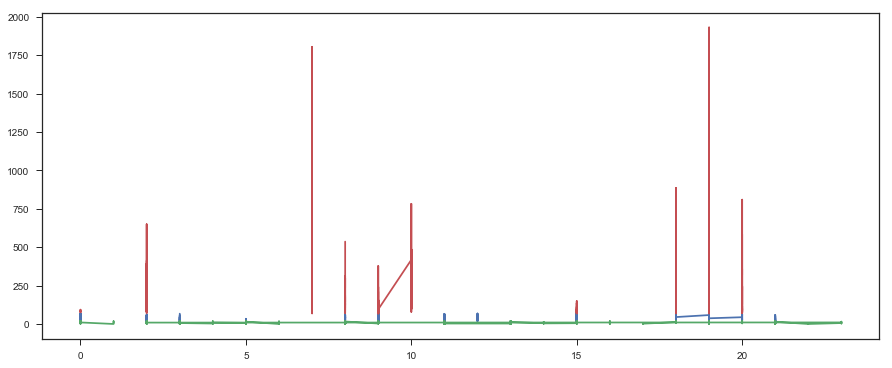

In [52]:
t = small_tomato_data["Market Area"]
s = small_tomato_data["Tonnes"]

upper = 70
lower = 20


supper = np.ma.masked_where(s < upper, s)
slower = np.ma.masked_where(s > lower, s)
smiddle = np.ma.masked_where(np.logical_or(s < lower, s > upper), s)

fig, ax = plt.subplots()
ax.plot(t, smiddle, t, slower, t, supper)
plt.show()

In [ ]:
sns.jointplot(x='Market Area', y='Modal Price(Rs./Quintal)', data=small_tomato_data, height=8, kind="reg")

In [ ]:
sns.jointplot(x='Market Area', y='Tonnes', data=small_tomato_data, height=8, kind="reg")

In [55]:
#df3.Market= le.fit_transform(df3.Market.astype(str))
df3.tail()

,datetime,modal_price,Quantity,Market
datetime,,,,
2018-04-28,2018-04-28,266.0,33.0,35.0
2018-04-29,2018-04-29,400.0,55.0,35.0
2018-04-30,2018-04-30,300.0,43.0,35.0
2018-04-04,2018-04-04,1000.0,6.0,39.0
2018-04-11,2018-04-11,1000.0,5.0,39.0


In [56]:
joint_dates = df3.resample('M').mean()
joint_dates

,modal_price,Quantity,Market
datetime,,,
2016-01-31,2014.743750,43.821875,18.381250
2016-02-29,576.628378,59.581081,18.111486
2016-03-31,463.690244,51.060976,18.404878
2016-04-30,1006.019178,56.717808,17.808219
2016-05-31,2637.943243,42.181081,18.554054
2016-06-30,3225.520000,52.720000,18.497500
2016-07-31,1546.734475,129.730193,18.473233
2016-08-31,556.674033,192.055249,18.261510
2016-09-30,699.133772,113.322368,18.131579


In [57]:
joint_dates.tail()
joint_dates['Market'] = tomato_data["Market Area"]
joint_dates.tail()

,modal_price,Quantity,Market
datetime,,,
2017-12-31,1007.619681,95.388298,NaN
2018-01-31,465.047170,103.591981,NaN
2018-02-28,438.070496,83.503916,NaN
2018-03-31,536.632603,67.445255,NaN
2018-04-30,646.696429,59.985714,NaN


## Group by area and month

In [58]:
cut_tomato_data = pd.get_dummies(data, columns=['Market Area'])
cut_tomato_data.head()

,Date,Tonnes,Variety,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal),Market Area_0,Market Area_1,Market Area_2,Market Area_3,...,Market Area_14,Market Area_15,Market Area_16,Market Area_17,Market Area_18,Market Area_19,Market Area_20,Market Area_21,Market Area_22,Market Area_23
0,02-01-2016,6.0,Tomato,1000,1800,1550,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,04-01-2016,6.0,Tomato,900,1800,1550,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,05-01-2016,6.0,Tomato,1400,2500,2200,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,06-01-2016,4.0,Tomato,1400,3000,2400,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,07-01-2016,5.0,Tomato,1400,2600,2200,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
f, ax = plt.subplots(figsize = (15,5))
sns.histplot(cut_tomato_data['Tonnes'], bins=10, kde=False)

In [ ]:
f, ax = plt.subplots(figsize = (15,5))
sns.histplot(cut_tomato_data['Modal Price(Rs./Quintal)'], bins=25, kde=False)

In [ ]:
sns.jointplot(x='Tonnes', y='Modal Price(Rs./Quintal)', data=cut_tomato_data, height=8, kind="reg")

In [62]:
df4 = pd.DataFrame()

df4['datetime'] =Arrival_date
df4['datetime'] = pd.to_datetime(df4['datetime'])

# Set the datetime column as the index
df4.index = df3['datetime'] 
df4.tail()

market_dates = df4.resample('M').count()
market_dates

,datetime
datetime,
2016-01-31,320
2016-02-29,296
2016-03-31,410
2016-04-30,365
2016-05-31,370
2016-06-30,400
2016-07-31,467
2016-08-31,543
2016-09-30,456


In [63]:
cut_tomato_data = cut_tomato_data.drop(['Variety', 'Date'], axis=1)
cut_tomato_data.tail()

,Tonnes,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal),Market Area_0,Market Area_1,Market Area_2,Market Area_3,Market Area_4,Market Area_5,...,Market Area_14,Market Area_15,Market Area_16,Market Area_17,Market Area_18,Market Area_19,Market Area_20,Market Area_21,Market Area_22,Market Area_23
11258,5.0,700,900,800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11259,6.0,750,950,850,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11260,7.0,900,1100,1000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11261,6.0,900,1100,1000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11262,5.0,900,1100,1000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
cut_tomato_data['Modal Price(Rs./Quintal)'] = pd.to_numeric(cut_tomato_data['Modal Price(Rs./Quintal)'], errors='coerce')
cut_tomato_data['Minimum Price(Rs./Quintal)'] = pd.to_numeric(cut_tomato_data['Minimum Price(Rs./Quintal)'], errors='coerce')
cut_tomato_data['Maximum Price(Rs./Quintal)'] = pd.to_numeric(cut_tomato_data['Maximum Price(Rs./Quintal)'], errors='coerce')

In [65]:
cut_tomato_data.describe()

,Tonnes,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal),Market Area_0,Market Area_1,Market Area_2,Market Area_3,Market Area_4,Market Area_5,...,Market Area_14,Market Area_15,Market Area_16,Market Area_17,Market Area_18,Market Area_19,Market Area_20,Market Area_21,Market Area_22,Market Area_23
count,11095.000000,11095.000000,11095.000000,11095.000000,11095.000000,11095.000000,11095.000000,11095.000000,11095.000000,11095.000000,...,11095.000000,11095.000000,11095.000000,11095.000000,11095.000000,11095.000000,11095.000000,11095.000000,11095.000000,11095.000000
mean,81.645246,866.312483,1626.747183,1284.428571,0.045065,0.043443,0.052546,0.059036,0.059036,0.053538,...,0.019739,0.073907,0.022893,0.073547,0.059396,0.017936,0.061920,0.029202,0.073276,0.010095
std,156.147368,927.089575,1389.437872,1128.143463,0.207457,0.203861,0.223136,0.235702,0.235702,0.225113,...,0.139107,0.261632,0.149570,0.261043,0.236375,0.132725,0.241021,0.168381,0.260601,0.099968
min,1.000000,22.000000,110.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,300.000000,600.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,500.000000,1030.000000,900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,73.000000,1000.000000,2200.000000,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1931.000000,9000.000000,10000.000000,9000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


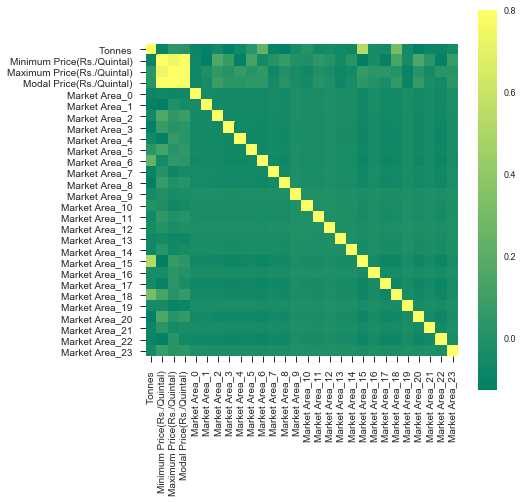

In [66]:
# Aim : To see which input features strongly corelate with other input features
corrmat = cut_tomato_data.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.set(font_scale = 0.9)
sns.heatmap(corrmat, vmax=.8, square=True, annot=False, fmt='.2f', cmap = "summer")
# cmap can
plt.show()

3 prices are highly correlated <br>
kolar 50% tonnes


In [67]:
ml_tomato_data = data.drop(['Date','Variety'], axis=1)
ml_tomato_data.head()

,Market Area,Tonnes,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal)
0,0,6.0,1000,1800,1550
1,0,6.0,900,1800,1550
2,0,6.0,1400,2500,2200
3,0,4.0,1400,3000,2400
4,0,5.0,1400,2600,2200


In [68]:
from sklearn import preprocessing
# Converting categorical data to numeric form
le = preprocessing.LabelEncoder()
ml_tomato_data['Market Area'] = le.fit_transform(ml_tomato_data['Market Area'].astype(str))
ml_tomato_data.tail()

,Market Area,Tonnes,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal)
11258,16,5.0,700,900,800
11259,16,6.0,750,950,850
11260,16,7.0,900,1100,1000
11261,16,6.0,900,1100,1000
11262,16,5.0,900,1100,1000


In [69]:
ml_tomato_data.describe()

,Market Area,Tonnes,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal)
count,11095.000000,11095.000000,11095.000000,11095.000000,11095.000000
mean,12.518702,81.645246,866.312483,1626.747183,1284.428571
std,6.493398,156.147368,927.089575,1389.437872,1128.143463
min,0.000000,1.000000,22.000000,110.000000,90.000000
25%,8.000000,4.000000,300.000000,600.000000,500.000000
50%,13.000000,20.000000,500.000000,1030.000000,900.000000
75%,18.000000,73.000000,1000.000000,2200.000000,1750.000000
max,23.000000,1931.000000,9000.000000,10000.000000,9000.000000


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\aishu\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\aishu\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\aishu\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\aishu\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\aishu\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Us

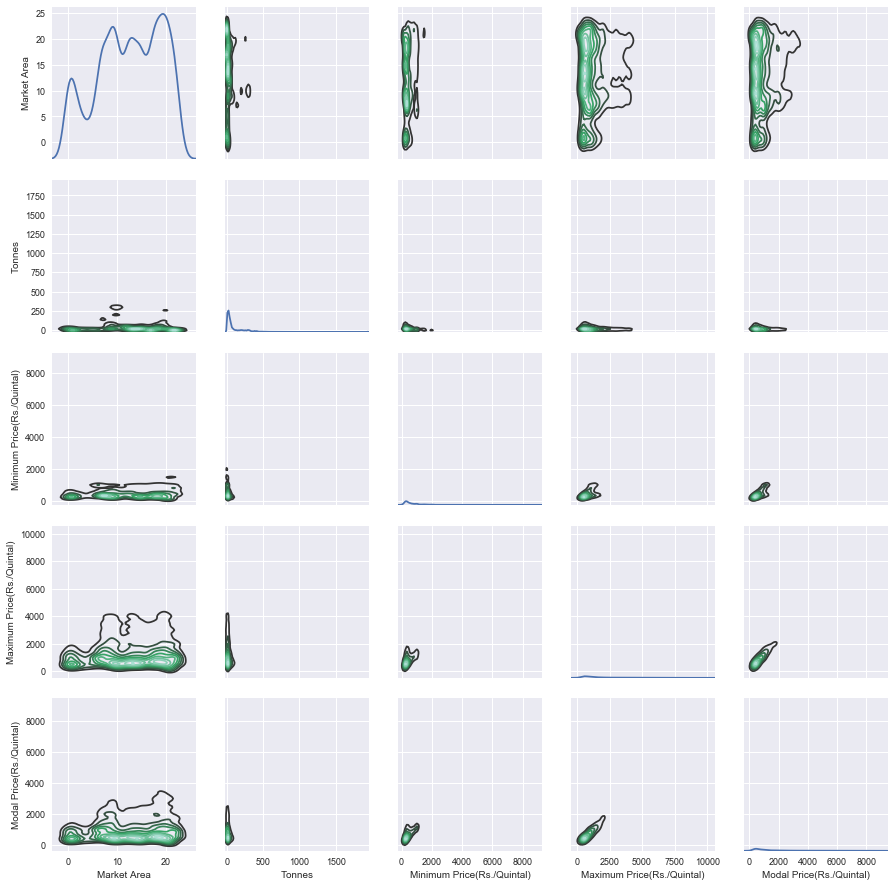

In [70]:
g = sns.PairGrid(ml_tomato_data)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot)#, n_levels=6);

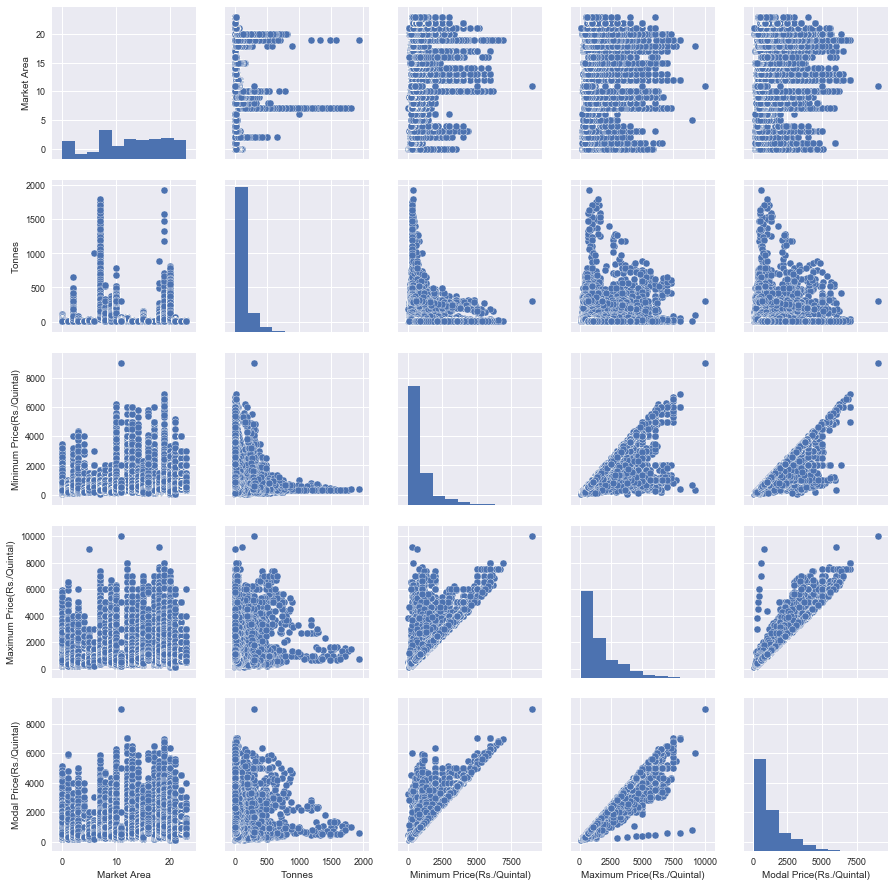

In [71]:
sns.pairplot(ml_tomato_data)